In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [120]:
df = pd.read_csv('Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [122]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [123]:
df.isnull().values.any()

False

In [124]:
df.drop(columns=['Id', 'Profession', 'CITY', 'STATE'], inplace=True)

In [125]:
df.rename(columns={'Married/Single':'Status'}, inplace=True)

In [127]:
df

,Income,Age,Experience,Status,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,6,11,0
251996,2843572,26,10,single,rented,no,6,11,0
251997,4522448,46,7,single,rented,no,7,12,0
251998,6507128,45,0,single,rented,no,0,10,0


<AxesSubplot:ylabel='Risk_Flag'>

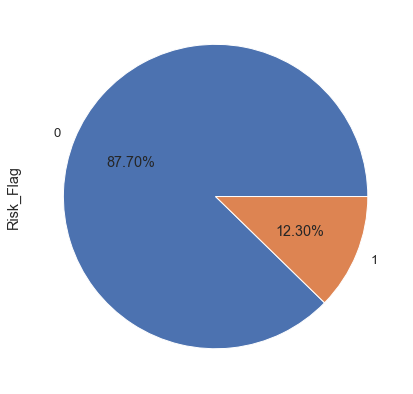

In [128]:
df['Risk_Flag'].value_counts().plot.pie(autopct='%.2f%%')

In [129]:
df

,Income,Age,Experience,Status,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,6,11,0
251996,2843572,26,10,single,rented,no,6,11,0
251997,4522448,46,7,single,rented,no,7,12,0
251998,6507128,45,0,single,rented,no,0,10,0


----------------------------------------------------------------------------------------------------
single     226272
married     25728
Name: Status, dtype: int64 



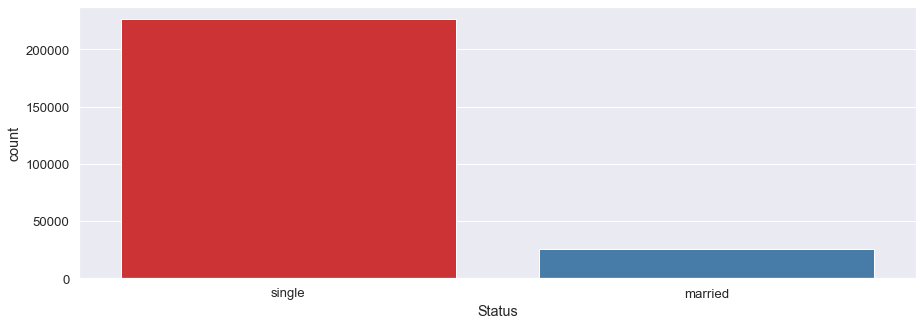

----------------------------------------------------------------------------------------------------
rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64 



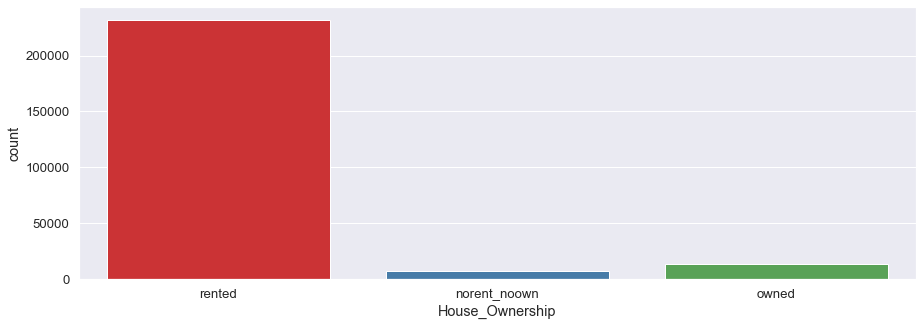

----------------------------------------------------------------------------------------------------
no     176000
yes     76000
Name: Car_Ownership, dtype: int64 



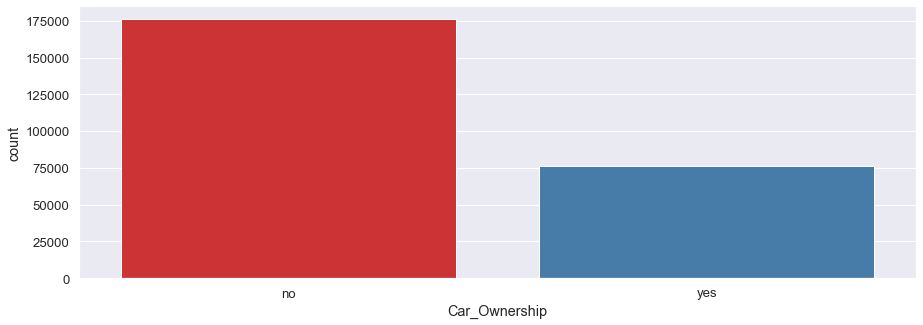

----------------------------------------------------------------------------------------------------
6     13158
9     12936
12    12800
18    12601
10    12503
5     12441
14    12369
19    12287
17    12131
16    12106
3     12069
15    11993
4     11807
13    11713
1     11575
11    11449
20    11350
8     11350
7     11232
2     11087
0     11043
Name: Experience, dtype: int64 



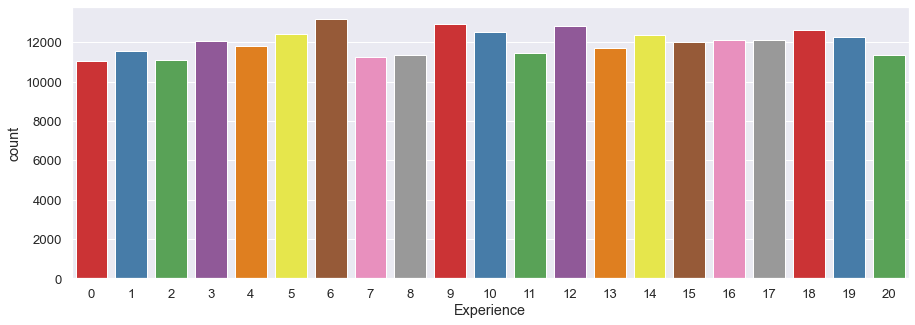

----------------------------------------------------------------------------------------------------
3     29460
4     28339
5     25091
6     23491
7     19925
8     18874
9     17132
10    15768
11    13595
1     11575
2     11087
0     11043
12    10605
13     9099
14     6916
Name: CURRENT_JOB_YRS, dtype: int64 



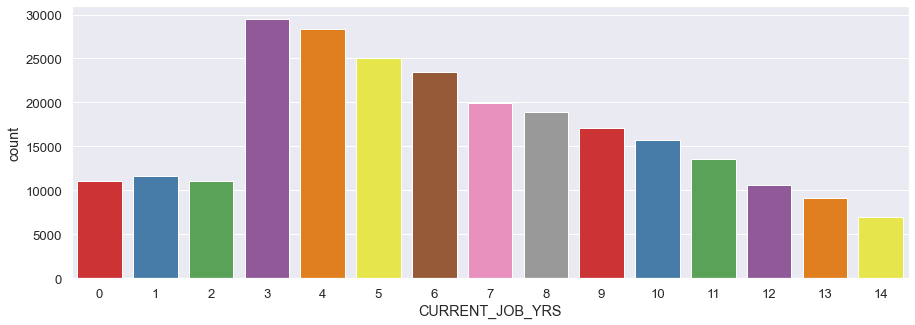

----------------------------------------------------------------------------------------------------
11    51873
12    51791
13    50659
14    49003
10    48674
Name: CURRENT_HOUSE_YRS, dtype: int64 



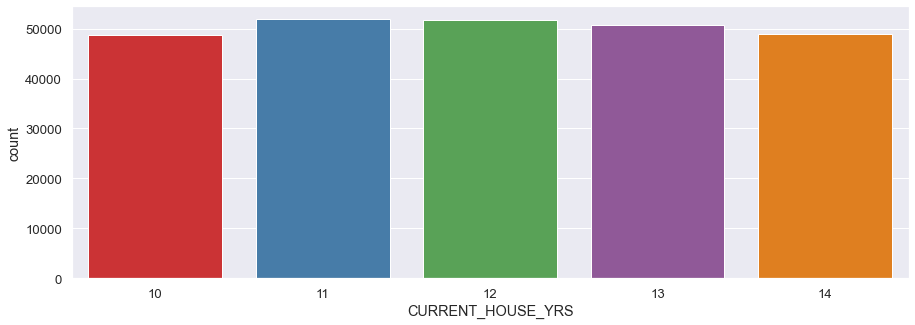

----------------------------------------------------------------------------------------------------
0    221004
1     30996
Name: Risk_Flag, dtype: int64 



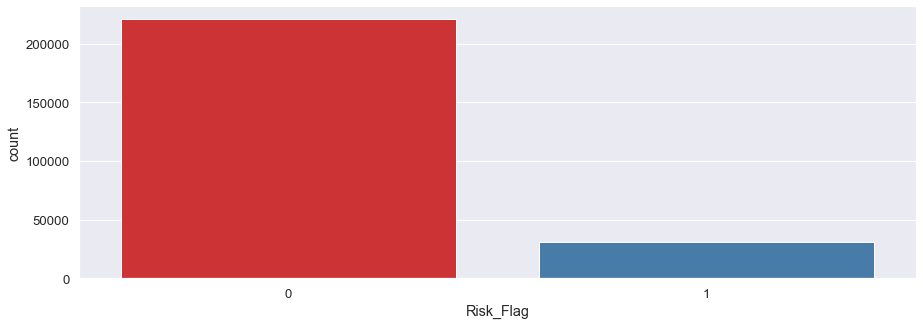

In [133]:
for col in df[['Status', 'House_Ownership', 'Car_Ownership', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 
               'Risk_Flag']]:
    print('-'*100)
    print(df[col].value_counts(), '\n')
    plt.figure(figsize=(15,5))
    sns.countplot(df[col], palette='Set1')
    plt.show()

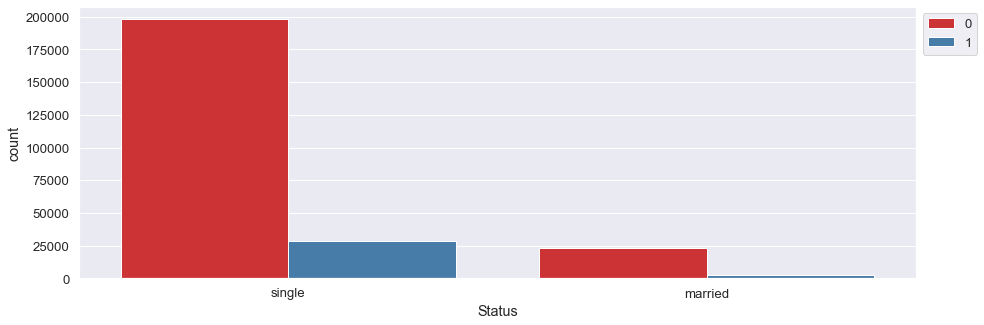

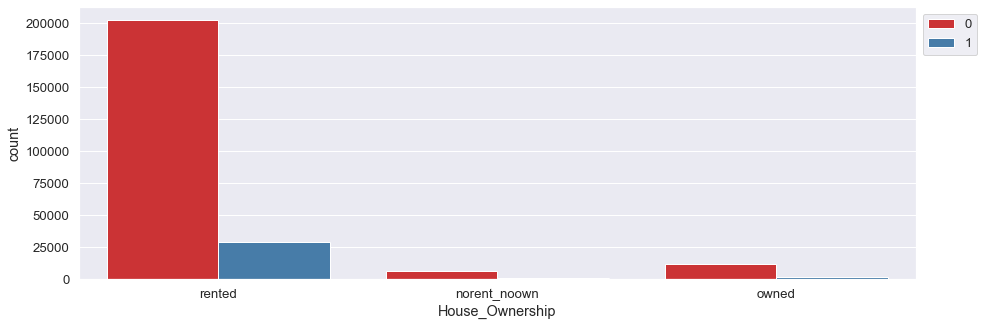

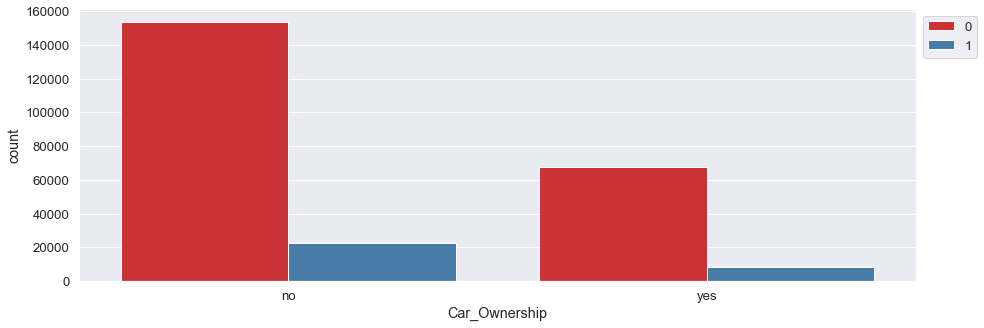

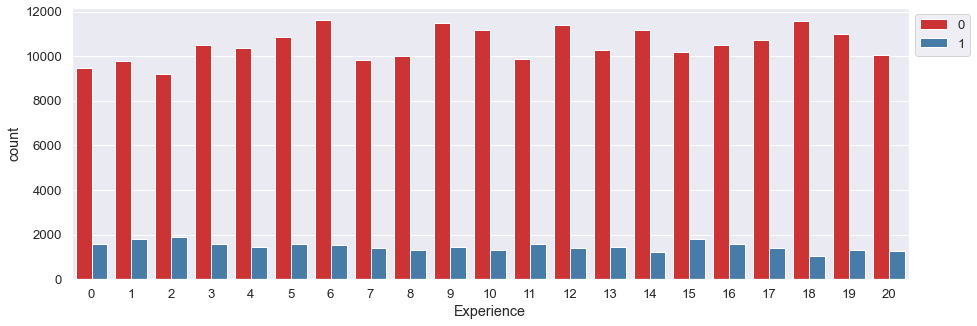

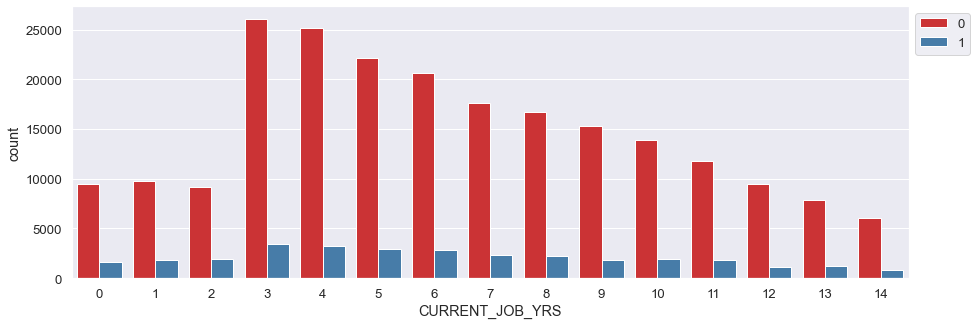

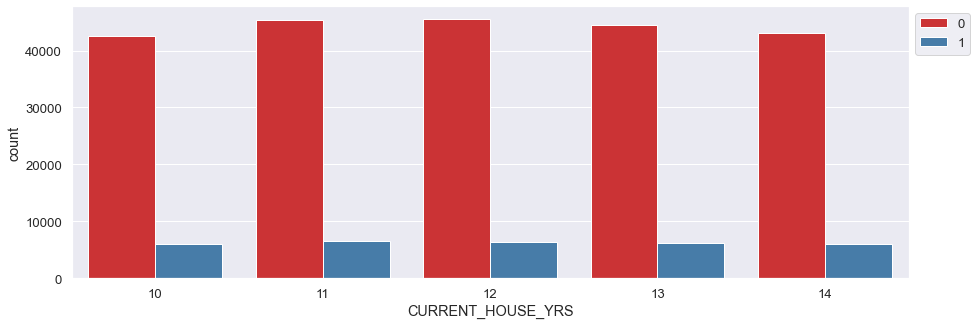

In [134]:
for col in df[['Status', 'House_Ownership', 'Car_Ownership', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]:
    plt.figure(figsize=(15,5))
    sns.countplot(df[col], hue=df['Risk_Flag'], palette='Set1')
    plt.legend(bbox_to_anchor=(1,1), loc=2)
    plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

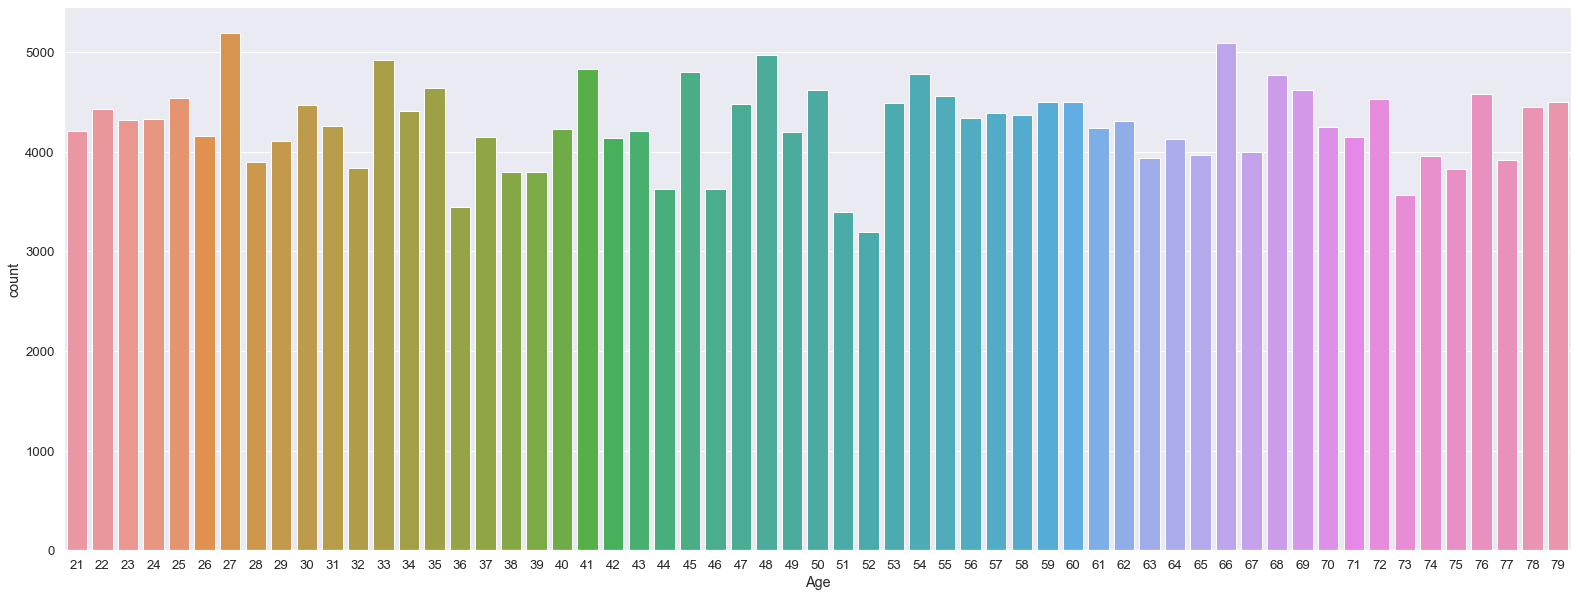

In [135]:
plt.figure(figsize=(27,10))
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

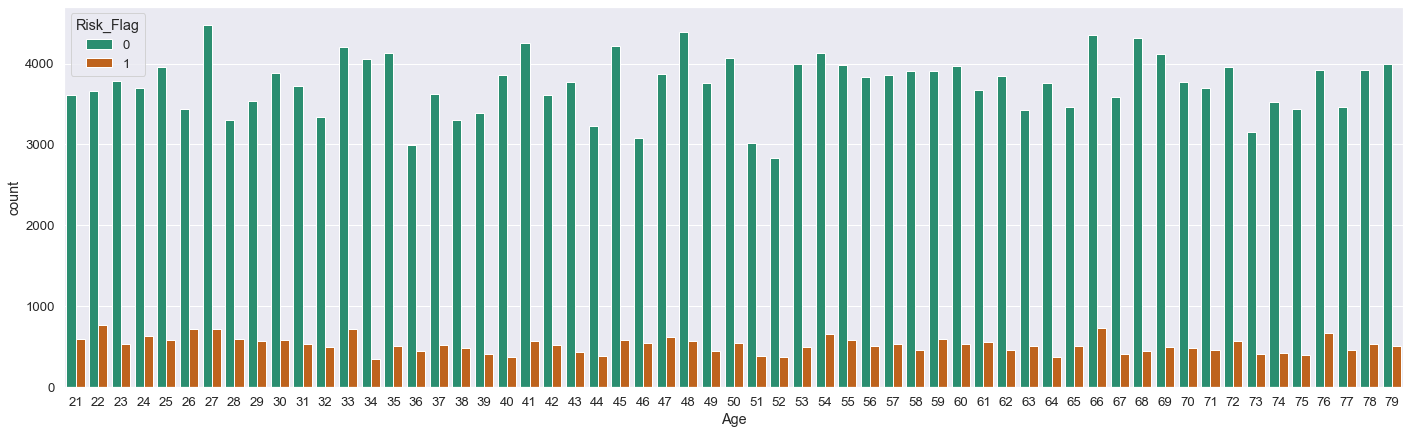

In [136]:
plt.figure(figsize=(24,7))
sns.countplot(df['Age'], hue=df['Risk_Flag'], palette='Dark2')

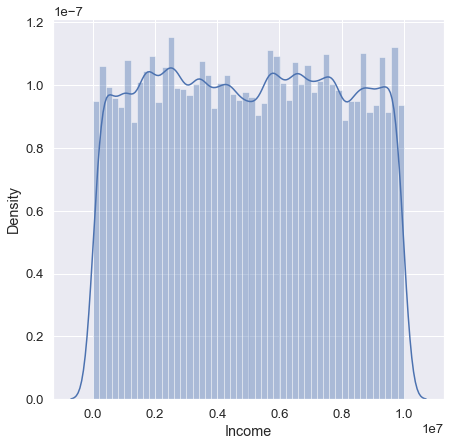

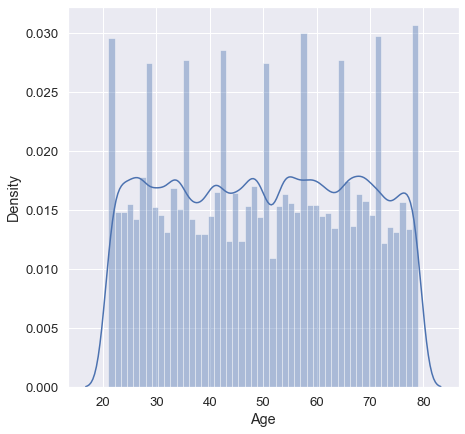

In [137]:
for col in df[['Income', 'Age']]:
    sns.distplot(df[col])
    plt.show()

<AxesSubplot:>

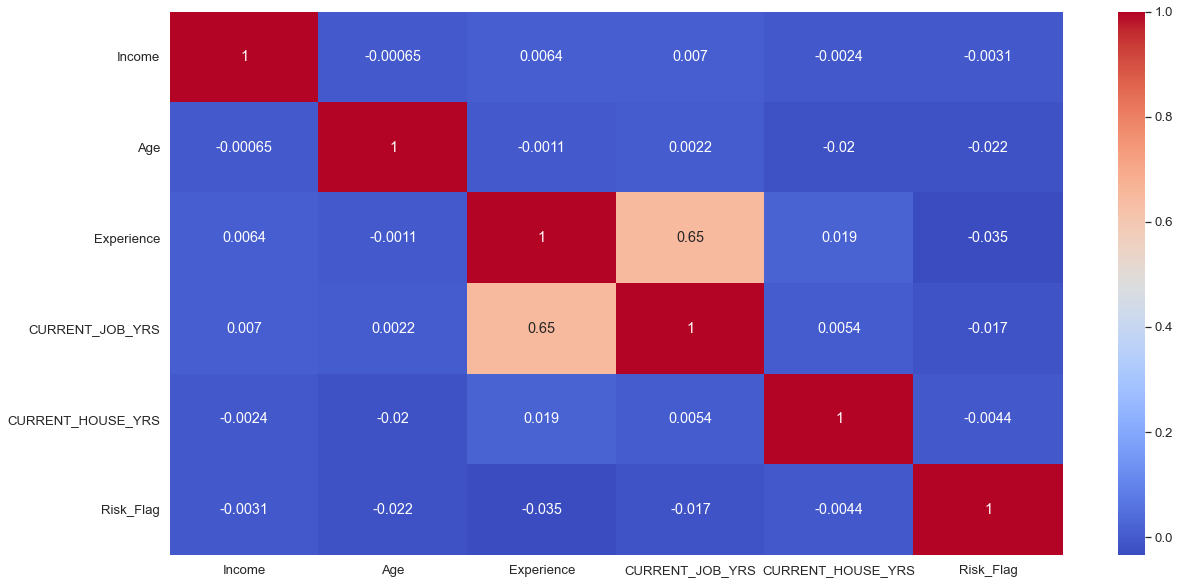

In [138]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='coolwarm' , annot=True)

In [139]:
df.head()

,Income,Age,Experience,Status,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1


In [140]:
df = pd.get_dummies(df, drop_first=True)

In [141]:
df.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Status_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes
0,1303834,23,3,3,13,0,1,0,1,0
1,7574516,40,10,9,13,0,1,0,1,0
2,3991815,66,4,4,10,0,0,0,1,0
3,6256451,41,2,2,12,1,1,0,1,1
4,5768871,47,11,3,14,1,1,0,1,0


In [142]:
df.shape

(252000, 10)

In [143]:
oversampled_X, oversampled_Y = SMOTE().fit_resample(df.drop('Risk_Flag', axis=1), df['Risk_Flag'])

In [144]:
X = oversampled_X
Y = oversampled_Y

In [145]:
Y.value_counts()

0    221004
1    221004
Name: Risk_Flag, dtype: int64

In [146]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=1)            

In [147]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [148]:
clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
y_pred_1 = clf1.predict(x_test)
print(f'Training Accuracy: {clf1.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_1)}')
print(confusion_matrix(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))
print(f'Testing Recall: {recall_score(y_test, y_pred_1)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_1)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_1)}')
print('-'*30)

Training Accuracy: 0.554716266126706
Testing Accuracy: 0.5502703558743015
[[22408 21842]
 [17915 26237]]
              precision    recall  f1-score   support

           0       0.56      0.51      0.53     44250
           1       0.55      0.59      0.57     44152

    accuracy                           0.55     88402
   macro avg       0.55      0.55      0.55     88402
weighted avg       0.55      0.55      0.55     88402

Testing Recall: 0.5942426164160174
Testing Precesion: 0.5457060254996984
Testing F-1: 0.5689410285045159
------------------------------


In [149]:
clf4 = DecisionTreeClassifier()
clf4.fit(x_train, y_train) 
y_pred_4 = clf4.predict(x_test)
print(f'Training Accuracy: {clf4.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_4)}')
print(confusion_matrix(y_test, y_pred_4))
print(classification_report(y_test, y_pred_4))
print(f'Testing Recall: {recall_score(y_test, y_pred_4)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_4)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_4)}')
print('-'*30)

Training Accuracy: 0.9573366967755073
Testing Accuracy: 0.9038935770683921
[[38088  6162]
 [ 2334 41818]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     44250
           1       0.87      0.95      0.91     44152

    accuracy                           0.90     88402
   macro avg       0.91      0.90      0.90     88402
weighted avg       0.91      0.90      0.90     88402

Testing Recall: 0.9471371625294437
Testing Precesion: 0.87157148812005
Testing F-1: 0.9077844831328962
------------------------------


In [150]:
clf6 = XGBClassifier()
clf6.fit(x_train, y_train) 
y_pred_6 = clf6.predict(x_test)
print(f'Training Accuracy: {clf6.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_6)}')
print(confusion_matrix(y_test, y_pred_6))
print(classification_report(y_test, y_pred_6))
print(f'Testing Recall: {recall_score(y_test, y_pred_6)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_6)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_6)}')
print('-'*30)

Training Accuracy: 0.8512185879198882
Testing Accuracy: 0.8435329517431732
[[35942  8308]
 [ 5524 38628]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     44250
           1       0.82      0.87      0.85     44152

    accuracy                           0.84     88402
   macro avg       0.84      0.84      0.84     88402
weighted avg       0.84      0.84      0.84     88402

Testing Recall: 0.8748867548468926
Testing Precesion: 0.8229930117606954
Testing F-1: 0.848146847005094
------------------------------


In [151]:
clf5 = RandomForestClassifier()
clf5.fit(x_train, y_train) 
y_pred_5 = clf5.predict(x_test)
print(f'Training Accuracy: {clf5.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_5)}')
print(confusion_matrix(y_test, y_pred_5))
print(classification_report(y_test, y_pred_5))
print(f'Testing Recall: {recall_score(y_test, y_pred_5)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred_5)}')
print(f'Testing F-1: {f1_score(y_test, y_pred_5)}')
print('-'*30)

Training Accuracy: 0.9573366967755073
Testing Accuracy: 0.9134521843397209
[[38345  5905]
 [ 1746 42406]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     44250
           1       0.88      0.96      0.92     44152

    accuracy                           0.91     88402
   macro avg       0.92      0.91      0.91     88402
weighted avg       0.92      0.91      0.91     88402

Testing Recall: 0.9604547925348795
Testing Precesion: 0.8777711080292273
Testing F-1: 0.9172533878416232
------------------------------


In [152]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)
print(f'Training Accuracy: {model.score(x_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Testing Recall: {recall_score(y_test, y_pred)}')
print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
print(f'Testing F-1: {f1_score(y_test, y_pred)}')
print('-'*30)

Training Accuracy: 0.9573366967755073
Testing Accuracy: 0.9041424402162846
[[38108  6142]
 [ 2332 41820]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     44250
           1       0.87      0.95      0.91     44152

    accuracy                           0.90     88402
   macro avg       0.91      0.90      0.90     88402
weighted avg       0.91      0.90      0.90     88402

Testing Recall: 0.9471824605906867
Testing Precesion: 0.8719402860597973
Testing F-1: 0.9080052977831816
------------------------------


In [153]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred_5}).head(20)

,y_test,y_pred
69599,0,0
324651,1,1
428926,1,1
415184,1,1
50411,0,0
58583,0,0
207552,0,0
109412,0,0
24134,0,1
39510,1,1


In [154]:
import joblib

In [155]:
joblib.dump(model, 'model.h5')    # save model

['model.h5']

In [156]:
joblib.dump(scaler, 'scaler.h5')  # save scaler

['scaler.h5']

In [157]:
X.columns

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Status_single', 'House_Ownership_owned', 'House_Ownership_rented',
       'Car_Ownership_yes'],
      dtype='object')

In [158]:
len(X.columns)

9